Load, preprocess and ICA

In [1]:

import glob 
import pandas as pd
import numpy as np
import mne 

path = r'data_eeg_oct9' # use your path
eegfiles = glob.glob(path + "/*.csv")
stimulusfiles = glob.glob(path + "/*.txt")

eegdict = {}
stimulusdict = {}

for filename in eegfiles:
    s = filename
    start = s.find("/data_") + len("/data_")
    end = s.rfind(".csv")
    extracted = s[start:end] 
    stimuluspath = path + "/stimulus " + extracted + ".txt"
    df = pd.read_csv(filename)
    stimulusrow = []
    with open (stimuluspath, "r") as myfile:
        stimulus = myfile.read().splitlines()
        for line in stimulus:
            values = line.strip().split(',')  
            stimulusrow.append([float(val) for val in values])
    stimulusarray = np.array(stimulusrow)
    dataarray = df.to_numpy()
    eegdict[extracted] = dataarray
    stimulusdict[extracted] = stimulusarray

In [2]:
df_names = ['multiple_imagery', 'multiple_sao','multiple_movefingers', 'multiple_eye','single4thtry', 'saotimevaries']

In [3]:
import numpy as np
import mne

# Dictionaries to store raw EEG data and epoch information
raw_dict = {}
epoch_dict = {}

def make_event_array(stimulus_timestamps, eeg_timestamps, labels):
    """
    Creates an array of events aligned with EEG timestamps.

    Parameters:
    - stimulus_timestamps: Timestamps when stimuli were presented.
    - eeg_timestamps: Timestamps from EEG data collection.
    - labels: Event labels corresponding to each stimulus timestamp.

    Returns:
    - event_arr: Array with [index, 0, label] for each event.
    """
    indices = []
    for st in stimulus_timestamps:
        # Consider only EEG timestamps that are before the stimulus timestamp
        valid_eeg_timestamps = eeg_timestamps[eeg_timestamps <= st]
        diffs = st - valid_eeg_timestamps  # Calculate differences
        index = np.argmin(diffs)  # Find the smallest difference
        actual_index = np.where(eeg_timestamps == valid_eeg_timestamps[index])[0][0]
        indices.append(actual_index)
    
    event_arr = np.vstack((indices, np.zeros_like(indices), labels)).astype(int).T
    return event_arr

# Processing routine for each dataset name
for name in df_names:
    stimulus_timestamps = stimulusdict[name][:, 0]
    eeg_timestamps = eegdict[name][:, 0]
    labels = stimulusdict[name][:, 1]
    
    # Create event array for epoching
    event_arr = make_event_array(stimulus_timestamps, eeg_timestamps, labels)

    # Load EEG data and create MNE Raw object
    data = eegdict[name]
    timearray = data[:, 0]
    dataarray = data[:, 1:9]
    channel_names = ['C3', 'C4', 'Pz', 'Fp1', 'P3', 'P4', 'A2', 'Cz']
    
    # Setup EEG information and create RawArray object
    info = mne.create_info(ch_names=channel_names, sfreq=250.0, ch_types='eeg')
    raw = mne.io.RawArray(dataarray.T, info)
    
    # Set channel types and montage
    raw.set_channel_types({'A2': 'eog'})
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)
    
    # Apply reference and filtering
    raw.set_eeg_reference(ref_channels=['A2'])
    raw.notch_filter([60, 120], method='fir', fir_design='firwin')
    raw.filter(l_freq=0.5, h_freq=50, method='fir', fir_design='firwin')

    # Create Epochs object from the raw data and event array
    epochs = mne.Epochs(raw, events=event_arr, event_id=None, tmin=0, tmax=1, baseline=None, preload=True, proj=False)

    # Store the raw and epochs data in dictionaries
    raw_dict[name] = raw
    epoch_dict[name] = epochs

Creating RawArray with float64 data, n_channels=8, n_times=95881
    Range : 0 ... 95880 =      0.000 ...   383.520 secs
Ready.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)



/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_6457/2122735764.py:54: RuntimeWarning: Not setting position of 1 eog channel found in montage:
['A2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
260 matching events found
No baseline correction applied
Using data from preloaded Raw for 260 events and 251 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=8, n_times=95819
    Range : 0 ... 95818 =      0.000 ...   383.272 secs
Ready.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setti

/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_6457/2122735764.py:54: RuntimeWarning: Not setting position of 1 eog channel found in montage:
['A2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_6457/2122735764.py:54: RuntimeWarning: Not setting position of 1 eog channel found in montage:
['A2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_6457/2122735764.py:54: RuntimeWarning: Not setting position of 1 eog channel found in montage:
['A2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types befo

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
260 matching events found
No baseline correction applied
Using data from preloaded Raw for 260 events and 251 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=8, n_times=174895
    Range : 0 ... 174894 =      0.000 ...   699.576 secs
Ready.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Set

/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_6457/2122735764.py:54: RuntimeWarning: Not setting position of 1 eog channel found in montage:
['A2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_6457/2122735764.py:54: RuntimeWarning: Not setting position of 1 eog channel found in montage:
['A2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


In [4]:
import mne.preprocessing as mnepp
icawithfp1dict={}

Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 0.7s.


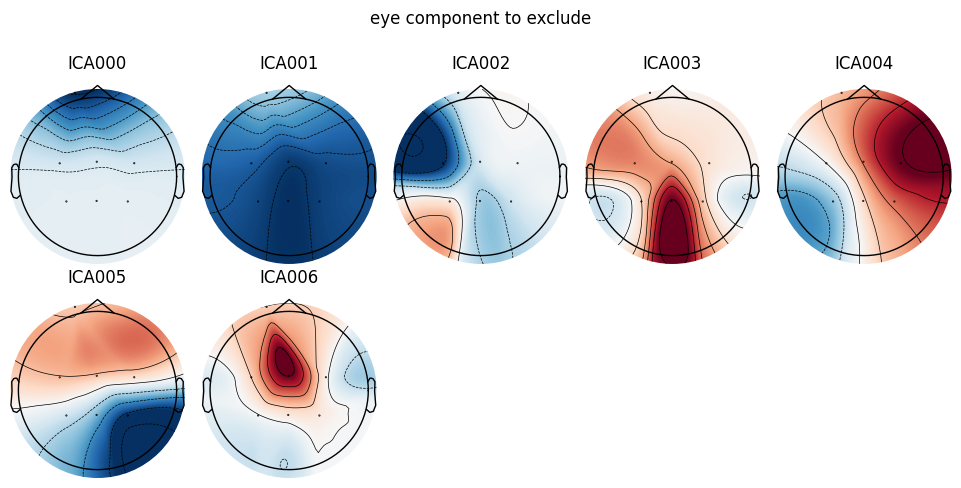

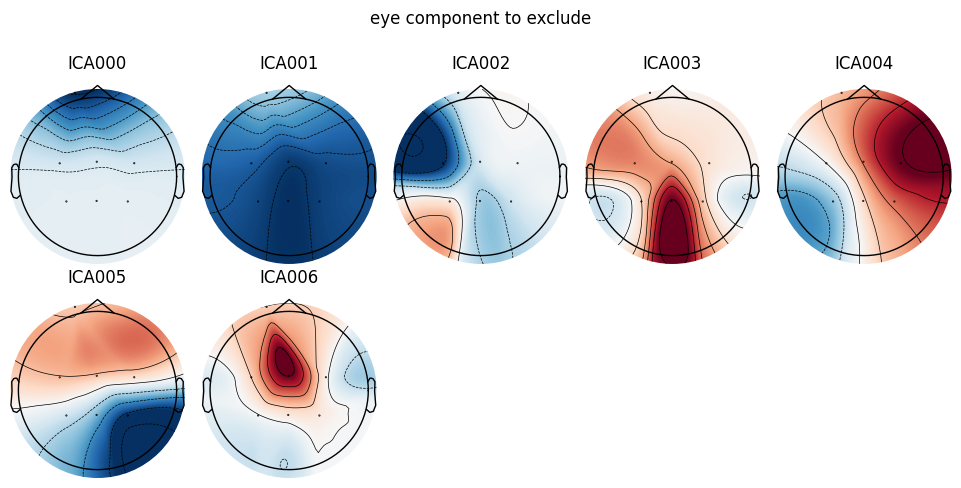

In [5]:
ica_new = mnepp.ICA(7,random_state=6)
ica_new.fit(raw_dict['multiple_eye'])
ica_new.plot_components(title='eye component to exclude')

Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.5s.


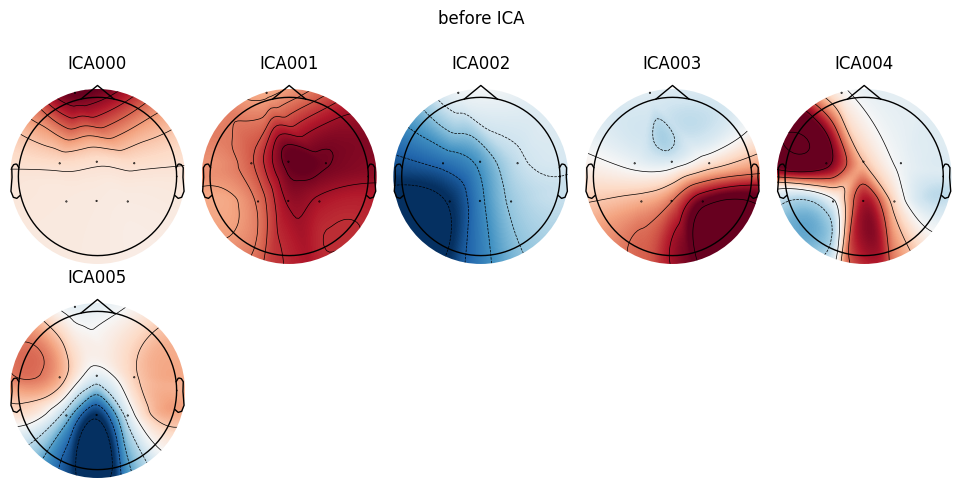

Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 5 ICA components
    Projecting back using 7 PCA components
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 2 components
Fitting ICA took 0.4s.


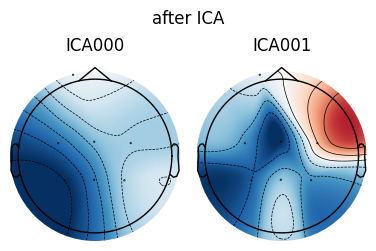

In [6]:
ica_new = mnepp.ICA(6,random_state=97)
ica_new.fit(raw_dict['multiple_movefingers'])
ica_new.plot_components(title='before ICA')
reconstructed_data = ica_new.apply(raw_dict['multiple_movefingers'].copy(), exclude=[0,1,3,4,5])

ica_new = mnepp.ICA(2, random_state=55)
ica_new.fit(reconstructed_data)
ica_new.plot_components(title='after ICA')
icawithfp1dict['multiple_movefingers']=reconstructed_data

Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 0.5s.


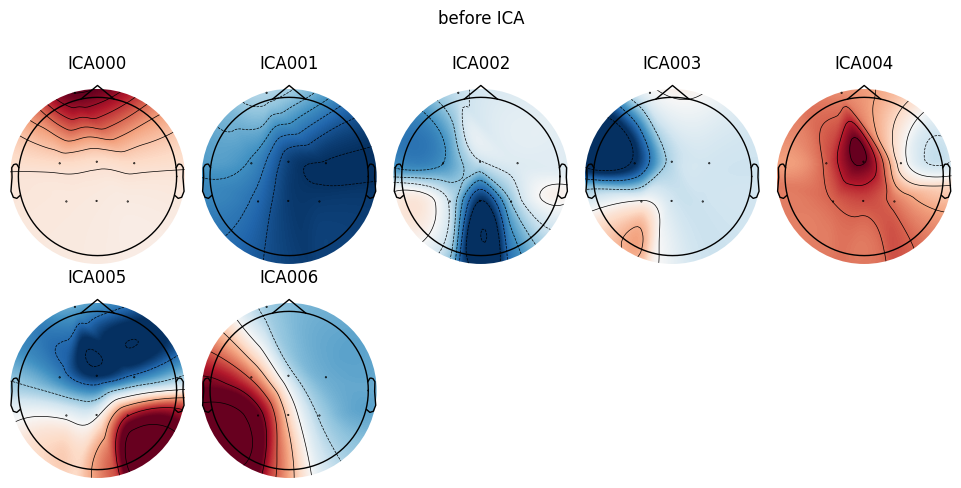

Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 6 ICA components
    Projecting back using 7 PCA components
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 2 components
Fitting ICA took 0.3s.


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_6457/2973283313.py:7: RuntimeWarning: Using n_components=2 (resulting in n_components_=2) may lead to an unstable mixing matrix estimation because the ratio between the largest (7) and smallest (3e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica_new.fit(reconstructed_data)


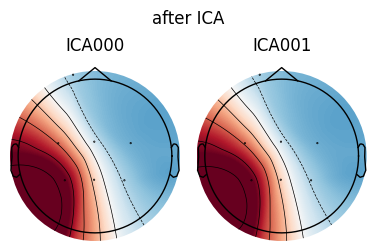

In [7]:
ica_new = mnepp.ICA(7,random_state=67)
ica_new.fit(raw_dict['multiple_imagery'])
ica_new.plot_components(title='before ICA')
reconstructed_data = ica_new.apply(raw_dict['multiple_imagery'].copy(), exclude=[0,1,2,3,4,5])

ica_new = mnepp.ICA(2, random_state=55)
ica_new.fit(reconstructed_data)
ica_new.plot_components(title='after ICA')
icawithfp1dict['multiple_imagery']=reconstructed_data

Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 0.4s.


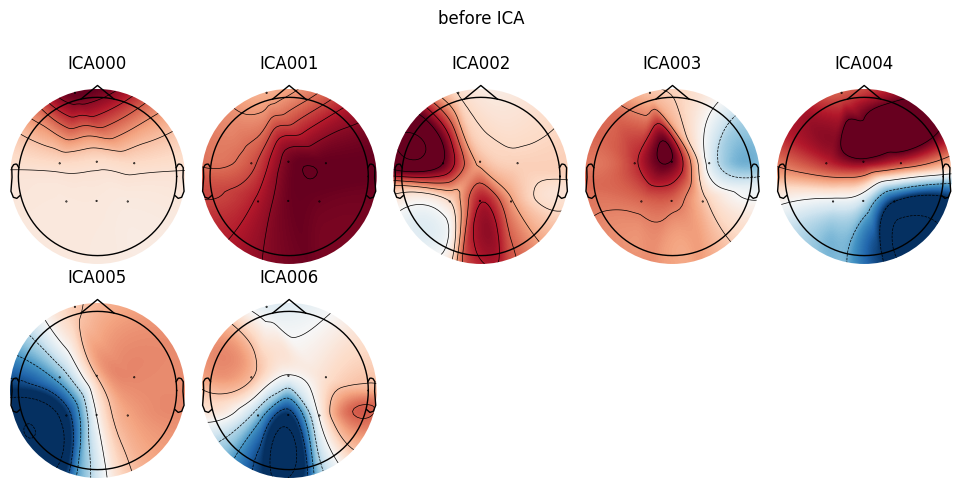

Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 6 ICA components
    Projecting back using 7 PCA components
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 2 components
Fitting ICA took 0.2s.


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_6457/3040883058.py:7: RuntimeWarning: Using n_components=2 (resulting in n_components_=2) may lead to an unstable mixing matrix estimation because the ratio between the largest (7) and smallest (2e-28) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica_new.fit(reconstructed_data)


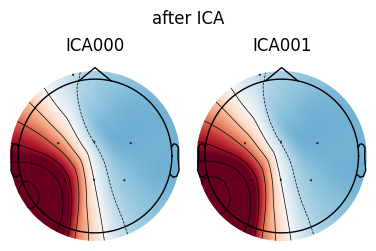

In [8]:
ica_new = mnepp.ICA(7, random_state=55)
ica_new.fit(raw_dict['multiple_sao'])
ica_new.plot_components(title='before ICA')
reconstructed_data = ica_new.apply(raw_dict['multiple_sao'].copy(), exclude=[0,1,2,3,4,6])

ica_new = mnepp.ICA(2, random_state=55)
ica_new.fit(reconstructed_data)
ica_new.plot_components(title='after ICA')
icawithfp1dict['multiple_sao']=reconstructed_data


Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 0.5s.


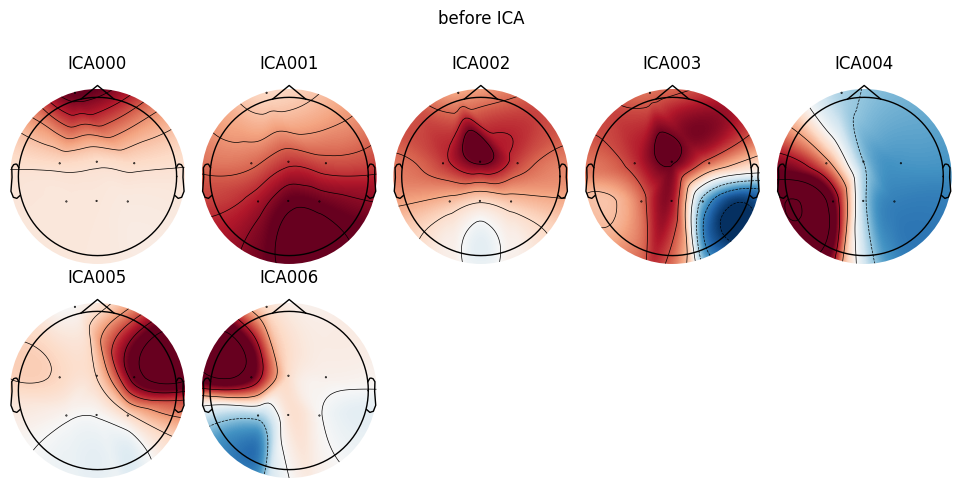

Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 6 ICA components
    Projecting back using 7 PCA components
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 2 components
Fitting ICA took 0.3s.


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_6457/1513385763.py:7: RuntimeWarning: Using n_components=2 (resulting in n_components_=2) may lead to an unstable mixing matrix estimation because the ratio between the largest (7) and smallest (3.3e-29) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica_new.fit(reconstructed_data)


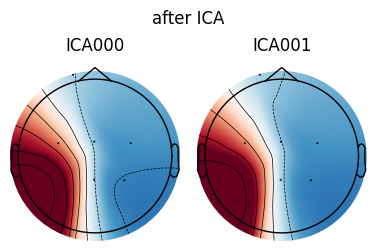

In [9]:
ica_new = mnepp.ICA(7, random_state=55)
ica_new.fit(raw_dict['single4thtry'])
ica_new.plot_components(title='before ICA')
reconstructed_data = ica_new.apply(raw_dict['multiple_sao'].copy(), exclude=[0,1,2,3,5,6,7])

ica_new = mnepp.ICA(2, random_state=55)
ica_new.fit(reconstructed_data)
ica_new.plot_components(title='after ICA')
icawithfp1dict['single4thtry']=reconstructed_data




In [10]:
#make new epochs dict with cleaned data with notch filter and iir 
notchepochs = {}
for name in icawithfp1dict.keys():
    stimulus_timestamps = stimulusdict[name][:,0]
    eeg_timestamps = eegdict[name][:,0]
    labels = stimulusdict[name][:,1]
    event_arr = make_event_array(stimulus_timestamps, eeg_timestamps, labels)
    notchepochs[name] = mne.Epochs(icawithfp1dict[name], events=event_arr, event_id=None, tmin=-0.3, tmax=1.3, baseline=None, preload=True,proj=False)

Not setting metadata
260 matching events found
No baseline correction applied
Using data from preloaded Raw for 260 events and 401 original time points ...
0 bad epochs dropped
Not setting metadata
260 matching events found
No baseline correction applied
Using data from preloaded Raw for 260 events and 401 original time points ...
0 bad epochs dropped
Not setting metadata
260 matching events found
No baseline correction applied
Using data from preloaded Raw for 260 events and 401 original time points ...
0 bad epochs dropped
Not setting metadata
400 matching events found
No baseline correction applied
Using data from preloaded Raw for 400 events and 401 original time points ...
184 bad epochs dropped


In [11]:
icawithfp1dict.keys()

dict_keys(['multiple_movefingers', 'multiple_imagery', 'multiple_sao', 'single4thtry'])

Epoch data into graph format

In [12]:
#Epoching preprocessed data 
import os
import pandas as pd
import numpy as np
import mne

# Define the name of the dataset to be processed
name = "multiple_movefingers"

# Extract timestamps and labels from the stimulus dictionary
stimulus_timestamps = stimulusdict[name][:, 0]
eeg_timestamps = eegdict[name][:, 0]
labels = stimulusdict[name][:, 1]
event_arr = make_event_array(stimulus_timestamps, eeg_timestamps, labels)

# Adjust node indices (assuming node indexing starts at 1)
event_arr[:, -1] += 1  # Increment all nodes by 1 as node 0 does not exist

# Recode specific nodes for clarity in representing different trial types
event_arr[event_arr[:, -1] == 401, -1] = 11  # Node 11 corresponds to trials of blank state
event_arr[event_arr[:, -1] == 101, -1] = 12  # Node 12 corresponds to ITI (Inter-Trial Interval) break

# Convert the event array into a DataFrame for further processing
df = pd.DataFrame(event_arr, columns=['timestamps', 'source', 'target'])

# Update the 'source' to be the 'target' of the preceding event
df['source'] = df['target'].shift(1)

# Rename columns to fit the expected format for subsequent analyses
df.columns = ["ts", "u", "i"]

# Initialize lists to store edge information
edge_labels = []
edge_indices = []

# Populate edge information lists with data from the DataFrame
for index, row in df.iterrows():
    # Format the edge label as 'u{source}_i{target}'
    edge_labels.append(f'u{row.u}_i{row.i}')
    edge_indices.append(index)

# Construct a DataFrame for edges using the edge information
edges_df = pd.DataFrame({'label': edge_labels, 'idx': edge_indices})

# Combine the original and edge DataFrames side by side
new_df = pd.concat([df, edges_df], axis=1)

# Specify channels to exclude from analysis
exclude_channels = ['Fp1', 'A2']

# Identify indices of channels to be excluded
exclude_indices = [channel_names.index(ch) for ch in exclude_channels if ch in channel_names]

# Retrieve EEG data and exclude specified channels
eeg_data = icawithfp1dict[name].get_data()
eeg_data = np.delete(eeg_data, exclude_indices, axis=0)

# Define parameters for frequency analysis
sampling_rate = 250  # Assumed sampling rate
n_fft = 128          # Assumed FFT size
frequency_resolution = sampling_rate / n_fft

# Calculate the frequency bin range for the desired frequency band (8-16 Hz)
low_freq_bin = int(8 / frequency_resolution)
high_freq_bin = int(16 / frequency_resolution)

# Perform time-frequency analysis using Morlet wavelets
eegs = []
for i in range(len(new_df)):
    # Extract EEG data for the current event
    start_idx = new_df.iloc[i]['ts']
    eeg_slice = eeg_data[:, start_idx:start_idx + 250]
    fft_res = mne.time_frequency.stft(eeg_slice, n_fft)
    
    # Select the power within the desired frequency band
    selected_band = fft_res[:, low_freq_bin:high_freq_bin + 1, :]
    power = np.abs(selected_band)
    power = power.reshape(-1, 4)
    eegs.append(power.T)

# Reshape and save the extracted features as a numpy array
eegs_array = np.vstack(eegs)
np.save(os.path.join(os.getcwd(), f'GNNmodel/processed/ml_{name}.npy'), eegs_array)

# Update DataFrame with corrected timestamps and initial state
new_df['ts'] = eeg_timestamps[df['ts'].astype(int)]
new_df['u'].iloc[0] = 12  # Set the first edge to start from an ITI break

# Save the DataFrame as a CSV file
pd.set_option('display.float_format', lambda x: '%.3f' % x)
new_df.to_csv(os.path.join(os.getcwd(), f'GNNmodel/processed/ml_{name}.csv'), index=False)

# Process ERP data for each hand to create node features
erps_fft = []

# Iterate through event IDs and perform FFT on ERP data
for eve in notchepochs['single4thtry'].event_id:
    if eve != '400':  # Exclude specific events if necessary
        node_feature = notchepochs[name][eve].crop(tmin=0, tmax=1).get_data()
        node_feature = np.delete(node_feature, exclude_indices, axis=1)
        
        # Compute the FFT for the average signal of each event
        eeg_slice = np.mean(node_feature, axis=0)
        fft_res = mne.time_frequency.stft(eeg_slice, n_fft)
        
        # Extract the power within the desired frequency band
        selected_band = fft_res[:, low_freq_bin:high_freq_bin + 1, :]
        power = np.abs(selected_band)
        power = power.reshape(-1, 4)
        erps_fft.append(power.T)

# Reorder and average the node features, then save them
node_arr = np.array(erps_fft)
reordered = np.concatenate((node_arr[-1, np.newaxis, ...], node_arr[:-1, ...]), axis=0)
reordered = np.mean(reordered, axis=1)

# Pad the array to account for the initial state and save as numpy array
n_feat_npy_padded = np.pad(reordered, ((1, 0), (0, 0)), mode='constant')
np.save(os.path.join(os.getcwd(), f'GNNmodel/processed/ml_{name}_node.npy'), n_feat_npy_padded)


Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4
Number of frequencies: 65
Number of time steps: 4


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_6457/2616331628.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['u'].iloc[0] = 12  # Set the first edge to start from an ITI break


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
-10434298.86485348 12237047.316973634


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_675/2995569171.py:18: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  evoked = epochs[event_id].average(picks=channel_names)
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_675/2995569171.py:18: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  evoked = epochs[event_id].average(picks=channel_names)


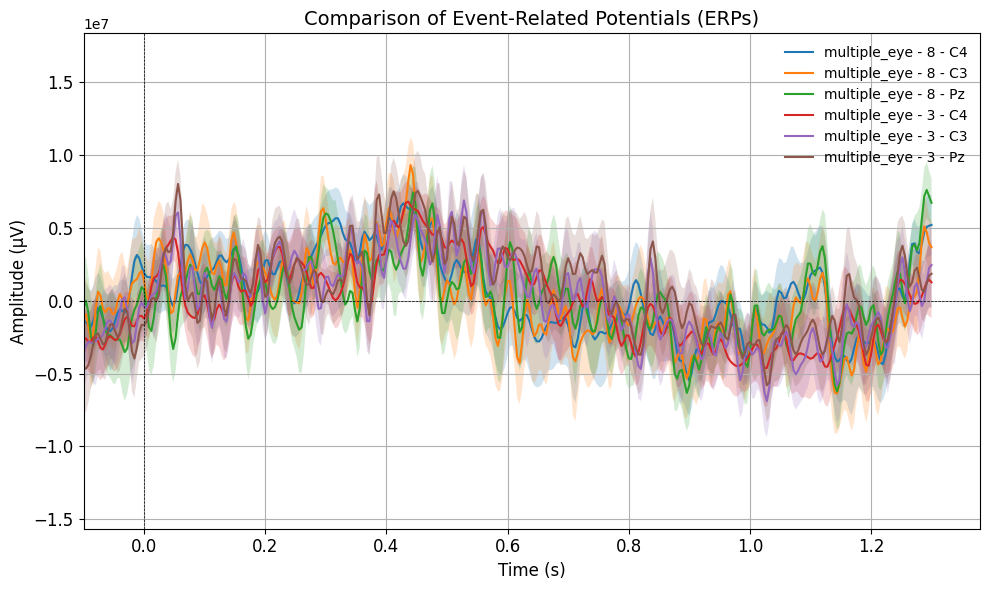

In [122]:
#Plot showing a roughly seen comparison between eyes signals and cleaned motor related signals(manually excluded ica components similar to eyes) 
plot_ERP_comparison(
    epochs_dict=notchepochs,  # Your epochs dictionary
    keys=['multiple_eye'],  # The specific keys you're interested in
    channel_names=['C4','C3','Pz'],  # The channels you want to plot
    event_ids=["8","3"]  # The event IDs you want to plot
)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
-2029899.0657544192 1669584.8082658616


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_675/2995569171.py:18: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  evoked = epochs[event_id].average(picks=channel_names)
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_675/2995569171.py:18: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  evoked = epochs[event_id].average(picks=channel_names)


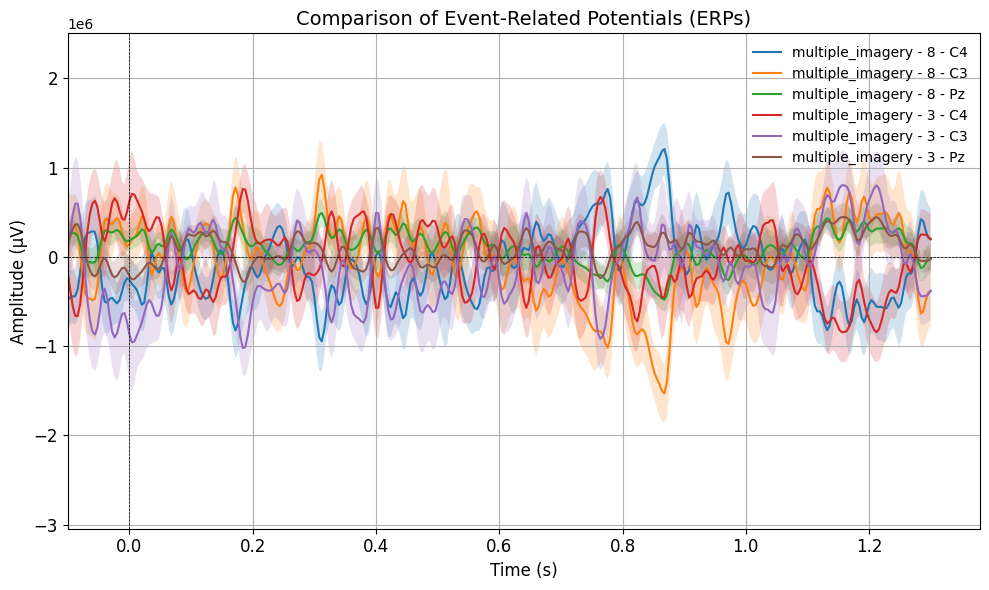

In [116]:
#
plot_ERP_comparison(
    epochs_dict=notchepochs,  # Your epochs dictionary
    keys=['multiple_imagery'],  # The specific keys you're interested in
    channel_names=['C4','C3','Pz'],  # The channels you want to plot
    event_ids=["8","3"]  # The event IDs you want to plot
)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
-3386156.545757305 2772584.476252309


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_675/2995569171.py:18: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  evoked = epochs[event_id].average(picks=channel_names)
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_675/2995569171.py:18: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  evoked = epochs[event_id].average(picks=channel_names)


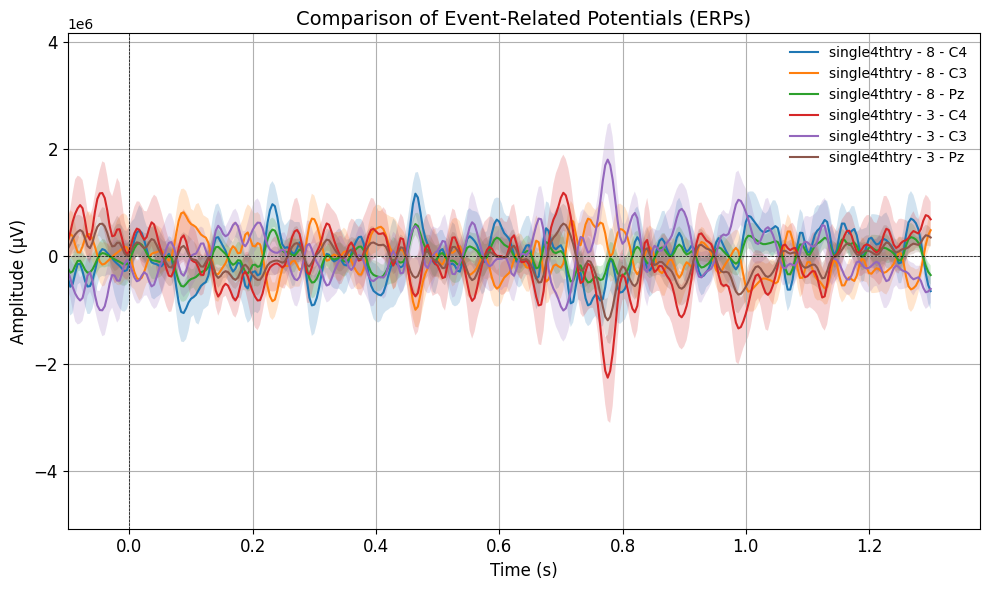

In [117]:
plot_ERP_comparison(
    epochs_dict=notchepochs,  # Your epochs dictionary
    keys=['single4thtry'],  # The specific keys you're interested in
    channel_names=['C4','C3','Pz'],  # The channels you want to plot
    event_ids=["8",'3']  # The event IDs you want to plot
)

In [53]:
import matplotlib.pyplot as plt
import mne

def plot_ERP_comparison(epochs_dict, keys, channel_names, event_ids):
    """
    Plots a comparison of ERPs from specified epochs, channels, and events.

    Parameters:
    - epochs_dict: dictionary containing epochs data.
    - keys: list of keys to specify which epochs to use from the epochs_dict.
    - channel_names: list of channel names to plot.
    - event_ids: list of event ids to plot from each Epoch.

    This function will plot the average data for the specified channels and events.
    """
    # Create subplots
    fig, ax = plt.subplots(figsize=(10, 6))

    # Check if channel_names and event_ids are lists, if not convert them
    if not isinstance(channel_names, list):
        channel_names = [channel_names]
    if not isinstance(event_ids, list):
        event_ids = [event_ids]

    # Loop through the specified keys (i.e., conditions)
    for key in keys:
        if key in epochs_dict:
            epochs = epochs_dict[key]

            # Loop through the specified events
            for event_id in event_ids:
                # Check if the event exists in the epochs
                if event_id in epochs.event_id:
                    # Get the average data for the specified channels
                    evoked = epochs[event_id].average(picks=channel_names)

                    # Plot the data
                    for channel_name in channel_names:
                        # Extracting data for the specific channel
                        channel_idx = evoked.ch_names.index(channel_name)
                        channel_data = evoked.data[channel_idx]

                        # Plotting
                        ax.plot(evoked.times, channel_data * 1e6, label=f"{key} - {event_id} - {channel_name}")  # Convert to microvolts

    # Enhance the plot
    ax.axhline(0, linestyle='--', color='black', linewidth=0.5)  # Add a horizontal line at zero
    ax.axvline(0, linestyle='--', color='black', linewidth=0.5)  # Add a vertical line at zero (stimulus onset)
    ax.set_title('Comparison of Event-Related Potentials (ERPs)', fontsize=14)
    ax.set_xlabel('Time (s)', fontsize=12)
    ax.set_ylabel('Amplitude (µV)', fontsize=12)
    ax.legend(loc='upper right', frameon=False)  # No frame around the legend
    ax.tick_params(axis='both', which='major', labelsize=12)  # Increase tick font size

    # Set limits and labels for better readability
    _, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.set_xlim([-0.1, xmax])  # Adjust as needed based on your epoch settings
    ax.set_ylim([1.5*ymin, 1.5*ymax])  # Slightly increase y-range for visual clarity

    plt.grid(True)  # Add a grid for easier visual estimation of values
    plt.tight_layout()  # Ensure spacing prevents clipping of labels
    plt.show()